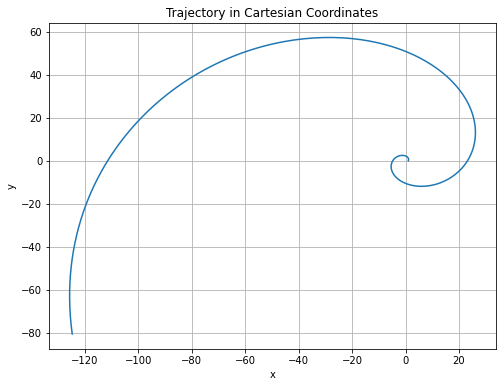

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for the system
alpha = 0.5
beta = 1.0

def system(t, z):
    x, y = z
    dxdt = alpha * x - beta * y
    dydt = beta * x + alpha * y
    return [dxdt, dydt]

# Solve the ODE system from a given initial condition
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 400)
initial_condition = [1, 0]
sol = solve_ivp(system, t_span, initial_condition, t_eval=t_eval)

x = sol.y[0]
y = sol.y[1]
# Convert to polar coordinates
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

# Plot the trajectory in Cartesian coordinates
plt.figure(figsize=(8,6))
plt.plot(x, y, label='Trajectory')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory in Cartesian Coordinates")
plt.grid(True)
plt.savefig('CartesianTrajectory.pdf', format='pdf')
plt.show()

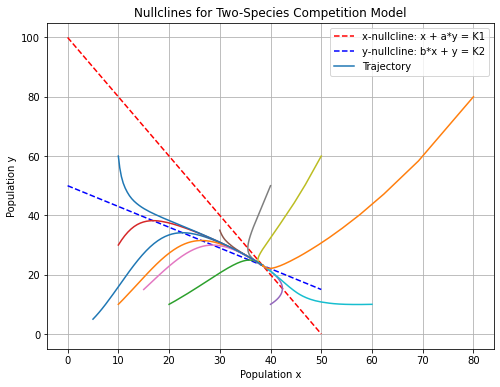

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for the two-species competition model
r1 = 1.0
r2 = 1.8
K1 = 50
K2 = 50
a = 0.5
b = 0.7

def competition_system(t, z):
    x, y = z
    dxdt = r1 * x * (1 - (x + a*y) / K1)
    dydt = r2 * y * (1 - (b*x + y) / K2)
    return [dxdt, dydt]

# Define nullclines:
# x-nullcline: x = 0  or x + a*y = K1 => y = (K1 - x) / a
# y-nullcline: y = 0  or b*x + y = K2 => y = K2 - b*x
x_vals = np.linspace(0, K1, 400)
nullcline1 = (K1 - x_vals) / a
nullcline2 = K2 - b*x_vals

plt.figure(figsize=(8,6))
plt.plot(x_vals, nullcline1, 'r--', label='x-nullcline: x + a*y = K1')
plt.plot(x_vals, nullcline2, 'b--', label='y-nullcline: b*x + y = K2')
plt.xlabel("Population x")
plt.ylabel("Population y")
plt.title("Nullclines for Two-Species Competition Model")

# Plot trajectories from various initial conditions
initial_conditions = [[5, 5], [10, 10], [20, 10], [10, 30], [40, 10], [30, 35], [15, 15], [40, 50], [50, 60], [60, 10], [10, 60], [80, 80]]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 400)
for ic in initial_conditions:
    sol = solve_ivp(competition_system, t_span, ic, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], lw=1.5, label="Trajectory" if ic==initial_conditions[0] else "")

plt.legend()
plt.grid(True)
plt.savefig('TwoSpeciesCompetition_Nullclines.pdf', format='pdf')
plt.show()

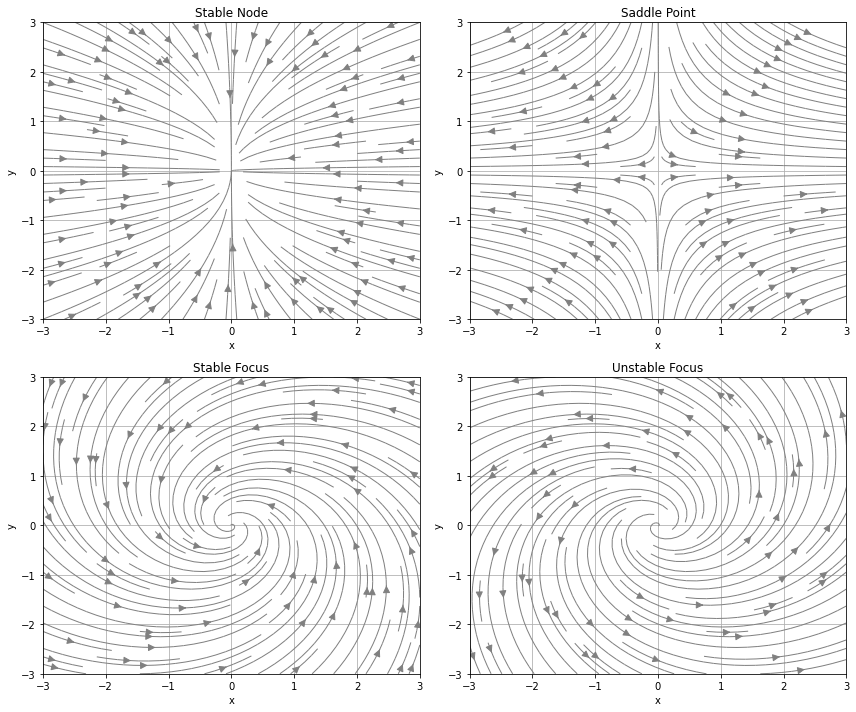

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_phase_portrait_stream_only(ax, A, title):
    # Define a grid for the vector field (streamplot)
    x_range = np.linspace(-3, 3, 20)
    y_range = np.linspace(-3, 3, 20)
    X, Y = np.meshgrid(x_range, y_range)
    # Compute the vector field: [dx, dy] = A * [x, y]
    U = A[0, 0] * X + A[0, 1] * Y
    V = A[1, 0] * X + A[1, 1] * Y

    # Plot the streamplot (flow field) using gray color.
    ax.streamplot(X, Y, U, V, color='gray', density=1.2, linewidth=1.0, arrowsize=1.5)
    
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.grid(True)

# Define matrices for different local stability types

# 1. Stable Node: Both eigenvalues are negative real numbers.
A_stable_node = np.array([[-2, 0],
                            [ 0, -1]])
# 2. Saddle Point: One eigenvalue positive, one negative (real).
A_saddle = np.array([[2, 0],
                     [0, -1]])
# 3. Stable Focus: Complex conjugate eigenvalues with negative real part.
A_stable_focus = np.array([[-1, -2],
                           [ 2, -1]])
# 4. Unstable Focus: Complex conjugate eigenvalues with positive real part.
A_unstable_focus = np.array([[ 1, -2],
                             [ 2,  1]])

# Create a 2x2 subplot for the 4 cases.
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plot_phase_portrait_stream_only(axs[0, 0], A_stable_node, 'Stable Node')
plot_phase_portrait_stream_only(axs[0, 1], A_saddle, 'Saddle Point')
plot_phase_portrait_stream_only(axs[1, 0], A_stable_focus, 'Stable Focus')
plot_phase_portrait_stream_only(axs[1, 1], A_unstable_focus, 'Unstable Focus')

plt.tight_layout()
plt.savefig('PhasePortraits_Streamplot_NoTrajectories.pdf', format='pdf')
plt.show()

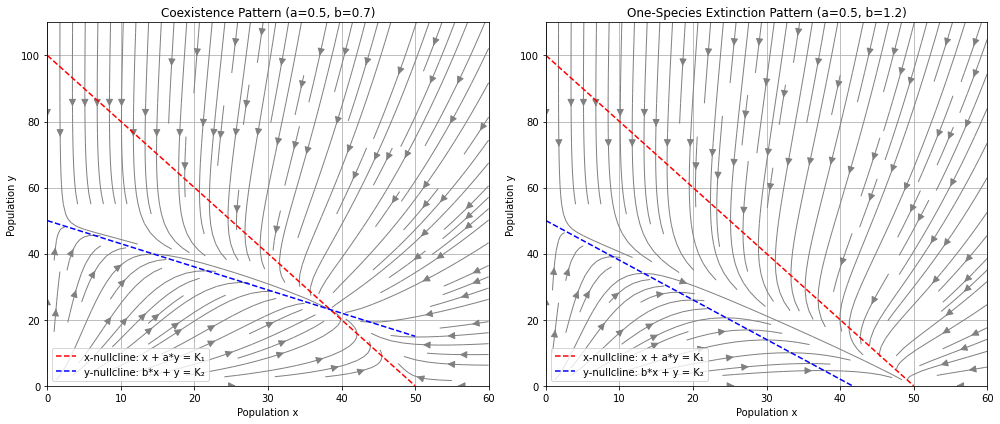

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Common parameters for the competition model
r1 = 1.0
r2 = 1.8
K1 = 50
K2 = 50

# Parameters for each case:
# Coexistence case:
a_coex = 0.5
b_coex = 0.7
# Extinction case (one species extinction, e.g. species 2):
a_ext = 0.5
b_ext = 1.2

# Define the two-species competition model vector field:
# dx/dt = r1 * x * (1 - (x + a*y)/K1)
# dy/dt = r2 * y * (1 - (b*x + y)/K2)
def competition_vector_field(x, y, r1, r2, K1, K2, a, b):
    dx = r1 * x * (1 - (x + a * y) / K1)
    dy = r2 * y * (1 - (b * x + y) / K2)
    return dx, dy

# Define grid for streamplot
x_min, x_max = 0, 60
y_min, y_max = 0, 110
x_vals = np.linspace(x_min, x_max, 30)
y_vals = np.linspace(y_min, y_max, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute vector field for each case
U_coex, V_coex = competition_vector_field(X, Y, r1, r2, K1, K2, a_coex, b_coex)
U_ext, V_ext   = competition_vector_field(X, Y, r1, r2, K1, K2, a_ext, b_ext)

# Prepare x座標用の連続な値（nullcline用）
x_line = np.linspace(x_min, K1, 400)

# Compute nullclines:
# x-nullcline: x + a*y = K1   =>   y = (K1 - x) / a
# y-nullcline: b*x + y = K2   =>   y = K2 - b*x

# For coexistence case:
nullcline_x_coex = (K1 - x_line) / a_coex    # y = (50-x)/0.5
nullcline_y_coex = K2 - b_coex * x_line        # y = 50 - 0.7*x

# For extinction case:
nullcline_x_ext = (K1 - x_line) / a_ext         # y = (50-x)/0.5  (a_ext equals a_coex)
nullcline_y_ext = K2 - b_ext * x_line           # y = 50 - 1.2*x

# Create a 1x2 figure for side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Coexistence case ---
ax = axs[0]
# Plot streamplot: flow field is shown in gray.
ax.streamplot(X, Y, U_coex, V_coex, color='gray', density=1.2, linewidth=1.0, arrowsize=1.5)
# Plot nullclines
ax.plot(x_line, nullcline_x_coex, 'r--', label='x-nullcline: x + a*y = K₁')
ax.plot(x_line, nullcline_y_coex, 'b--', label='y-nullcline: b*x + y = K₂')
ax.set_title("Coexistence Pattern (a=0.5, b=0.7)")
ax.set_xlabel("Population x")
ax.set_ylabel("Population y")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.legend()
ax.grid(True)

# --- Extinction case ---
ax = axs[1]
ax.streamplot(X, Y, U_ext, V_ext, color='gray', density=1.2, linewidth=1.0, arrowsize=1.5)
ax.plot(x_line, nullcline_x_ext, 'r--', label='x-nullcline: x + a*y = K₁')
ax.plot(x_line, nullcline_y_ext, 'b--', label='y-nullcline: b*x + y = K₂')
ax.set_title("One-Species Extinction Pattern (a=0.5, b=1.2)")
ax.set_xlabel("Population x")
ax.set_ylabel("Population y")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.savefig('TwoSpeciesCompetition_Streamplot_Comparison.pdf', format='pdf')
plt.show()